In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve





/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1. Data axploration and cleaning

In [2]:
df = pd.read_csv('2019_DataScientistTest_ChurnDataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for column in df:
    print(column, df[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# The Data Cleaning steps:
1. 'TotalCharges' column has values represented as string, we convert those values to float
2. Replace 'No Internet Service' values to just 'No'
3. Replacing 'Yes' or 'No' values to numbers 


In [6]:
#astype method didn't work, as there are white space charactets in the column.
#Total count of those values is 11 0.15% so we can remove them
df[df['TotalCharges']==' ']['TotalCharges'].count()/df['TotalCharges'].count()*100


0.1561834445548772

In [7]:
#For the 'No internet service' values it seems that it means that a customer used other than internet services 
#such as telephone or TV-> i t means that it's better to replace those values to in all the columns to 'No'
df[df['StreamingMovies']=='No internet service']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [8]:
def clean_dataset(df):
    
    #Clean TotalCharges with replacing white spaces, converting to float and removing nans
    df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
    df=df.dropna()
    
    #Replace 'No internet service' to 'No'
    to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV','StreamingMovies','MultipleLines' ]
    for c in to_replace:
        df[c]=df[c].replace({'No internet service': 'No', 'No phone service':'No'})
        
    return df
    
df_pre_cleaned = clean_dataset(df)
    

/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# 2. Visualization

1. Analyze traget variable - 'Churn'

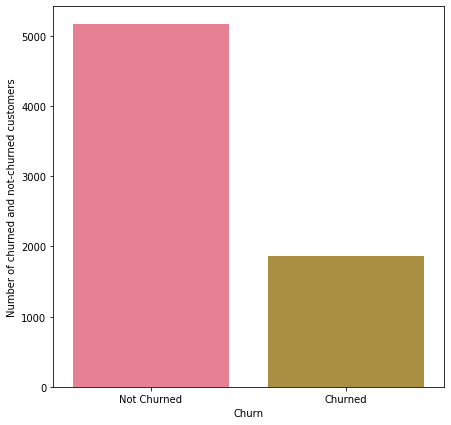

In [9]:
sns.set_palette(sns.color_palette("husl"))
plt.figure(figsize=(7,7))

sns.countplot('Churn', data=df_pre_cleaned)
# (df['gender'].value_counts()/len(df)*100.0).plot(kind='bar',stacked = True,rot = 0, hue='Churn')
plt.ylabel('Number of churned and not-churned customers')
plt.xticks([0,1],['Not Churned', 'Churned'])
plt.show()

The dataset s quite imbalanced as it is only around 25% for churned customers

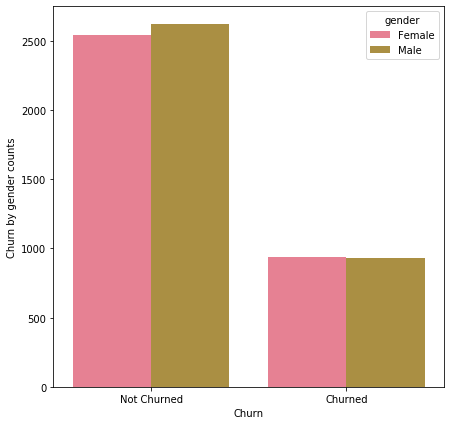

In [10]:
plt.figure(figsize=(7,7))
sns.countplot('Churn', data=df_pre_cleaned, hue='gender')
plt.ylabel('Churn by gender counts')
plt.xticks([0,1],['Not Churned', 'Churned'])
plt.show()


Gender rate in number of churned and not customers are almost the same, which might mean that  it's not very informative feature for our target variable

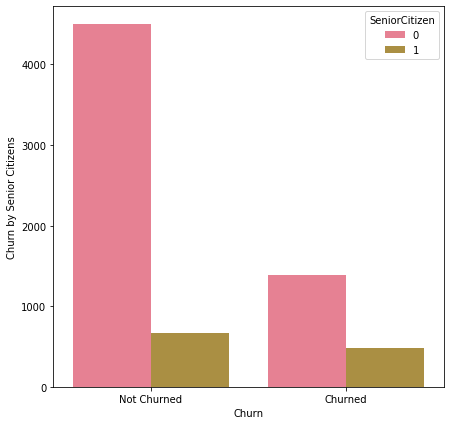

In [11]:
plt.figure(figsize=(7,7))
sns.countplot('Churn', data=df_pre_cleaned, hue='SeniorCitizen')
plt.ylabel('Churn by Senior Citizens')
plt.xticks([0,1],['Not Churned', 'Churned'])
plt.show()


Here we see a huge difference between counts of senior citizens and younger people. Overall, the seniors rate in general is lower than number of younger people. The churn number is also lower, later we'll check how this feature is correlated to our target variable.

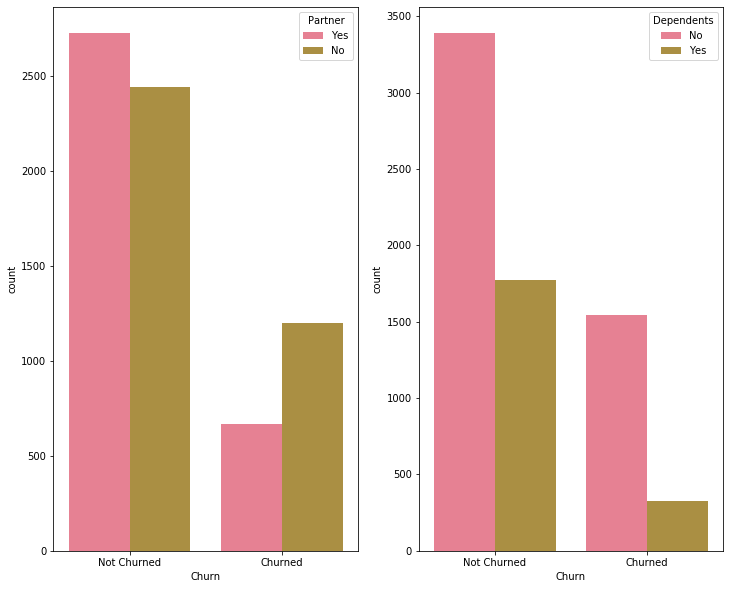

In [12]:
columns=['Partner','Dependents']
plt.figure(figsize=(12,10))
for col, hue in zip([1,2], columns):
    plt.subplot(1,2,col)
    sns.countplot('Churn', data=df_pre_cleaned, hue=hue)
    plt.xticks([0,1],['Not Churned', 'Churned'])
plt.show()

By these two plot in generel we can say that customers with partners and with kids tend to lower churn rate than single customers.

In [13]:
#Split dataset by Churn variable
churned = df_pre_cleaned[df_pre_cleaned.Churn=='Yes']
not_churned = df_pre_cleaned[df_pre_cleaned.Churn=='No']

In [14]:
#Prepare list of features which have to be cleaned
lst=[
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

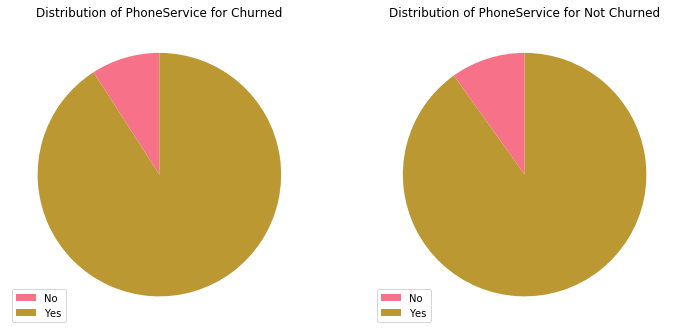

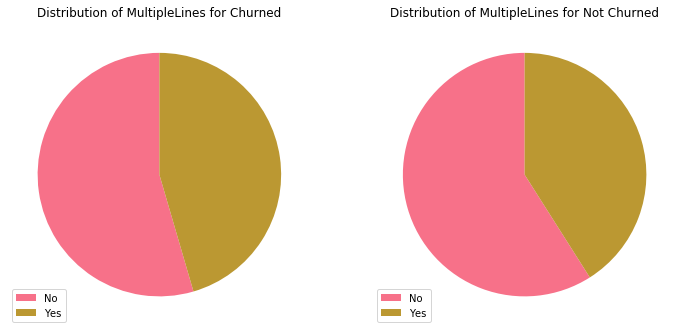

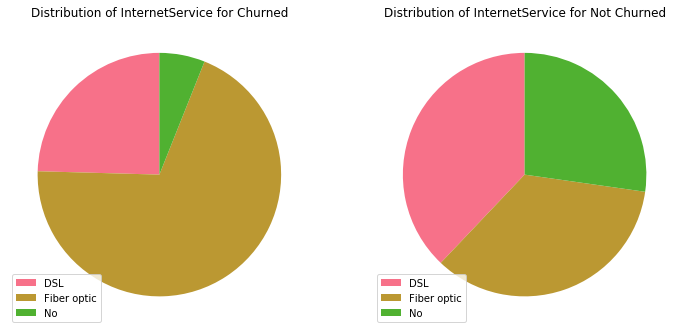

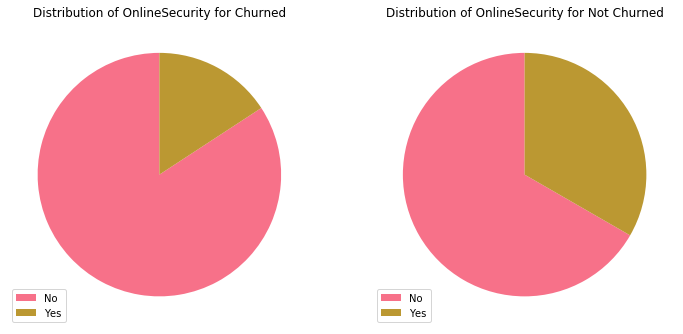

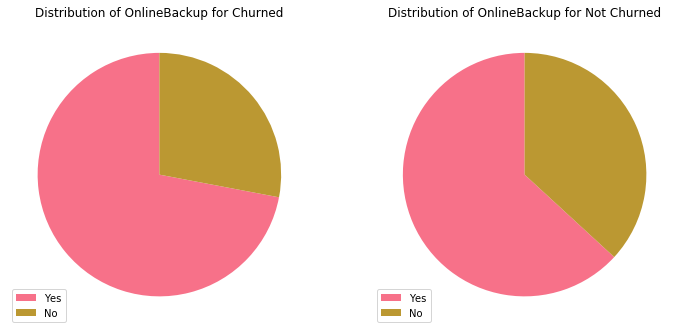

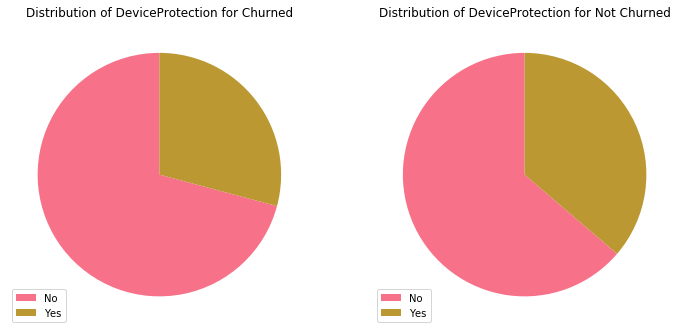

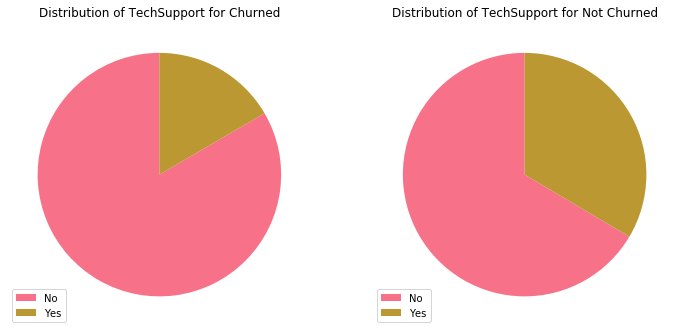

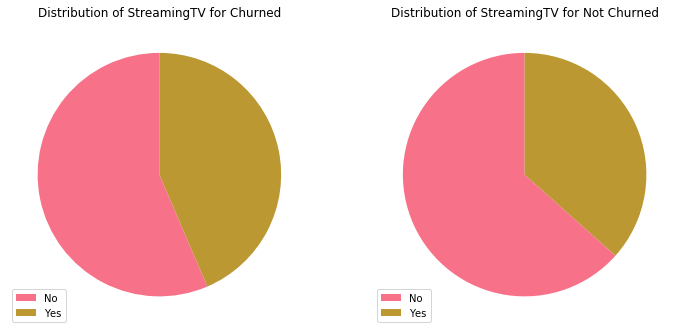

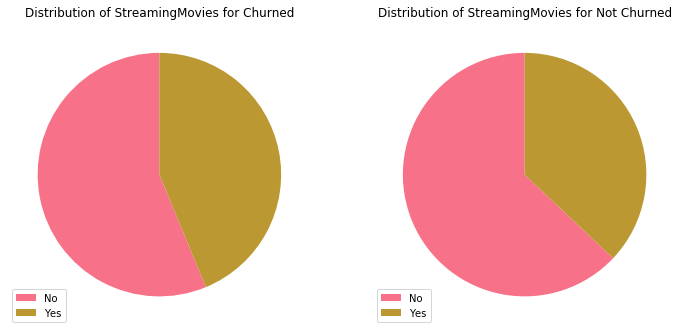

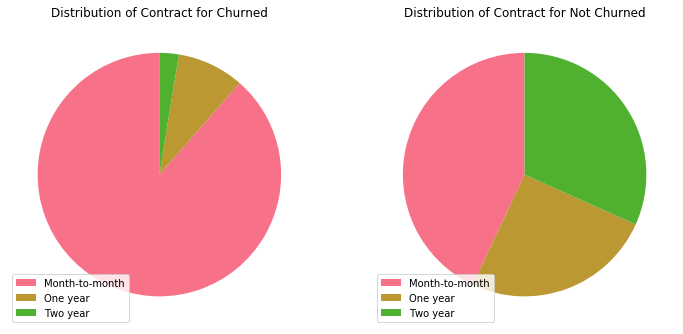

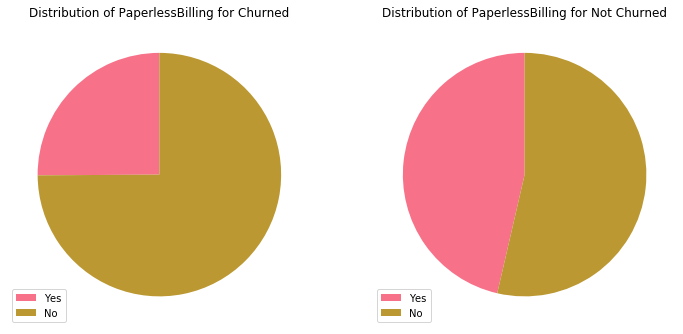

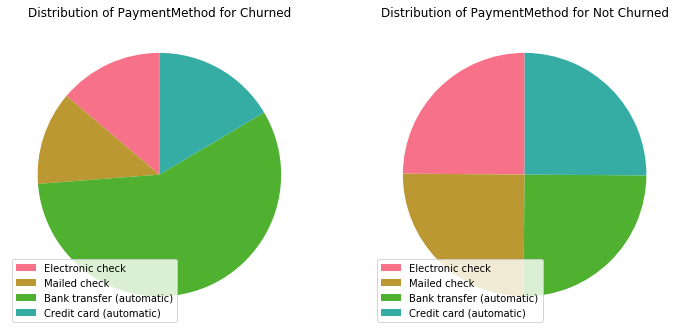

In [15]:

def draw_plot(feature, labels):
    
    plt.figure(figsize=(12,10))
   
    for sub, df in zip([1,2],[churned, not_churned]):
            plt.subplot(1,2,sub)
            plt.pie(df[feature].value_counts().sort_index().values, startangle=90)
            plt.legend(labels, loc=3)
            
            if sub==1:
                plt.title(f'Distribution of {feature} for Churned')
            else:
                plt.title(f'Distribution of {feature} for Not Churned')
    plt.show()
    
            
for feature in lst:
    draw_plot(feature, df_pre_cleaned[feature].unique())


On these plots we can see that there might be some affect on the churn rate from such features as:
- InternetServise
- OnlineSecurity
- DeviseProtection
- TechSupport
- Contract
- PaperlessBilling
- PaymentMethod


In [16]:
def prepare_dataset(df):
#   Replace 'Yes' and 'No' to numeric values
    for c in df:
        if 'Yes' in df[c].unique():
            df[c] = df[c].replace({'Yes':1, 'No':0})
    
    #Convert to numeric type
    df['TotalCharges']=df['TotalCharges'].astype('float')
    
    #Drop CustomerID column
    df = df.drop('customerID',1)
    
    #Convert categorical variables to numeric
    df = pd.get_dummies(df)
    
    return df


df_cleaned = prepare_dataset(df_pre_cleaned)

/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

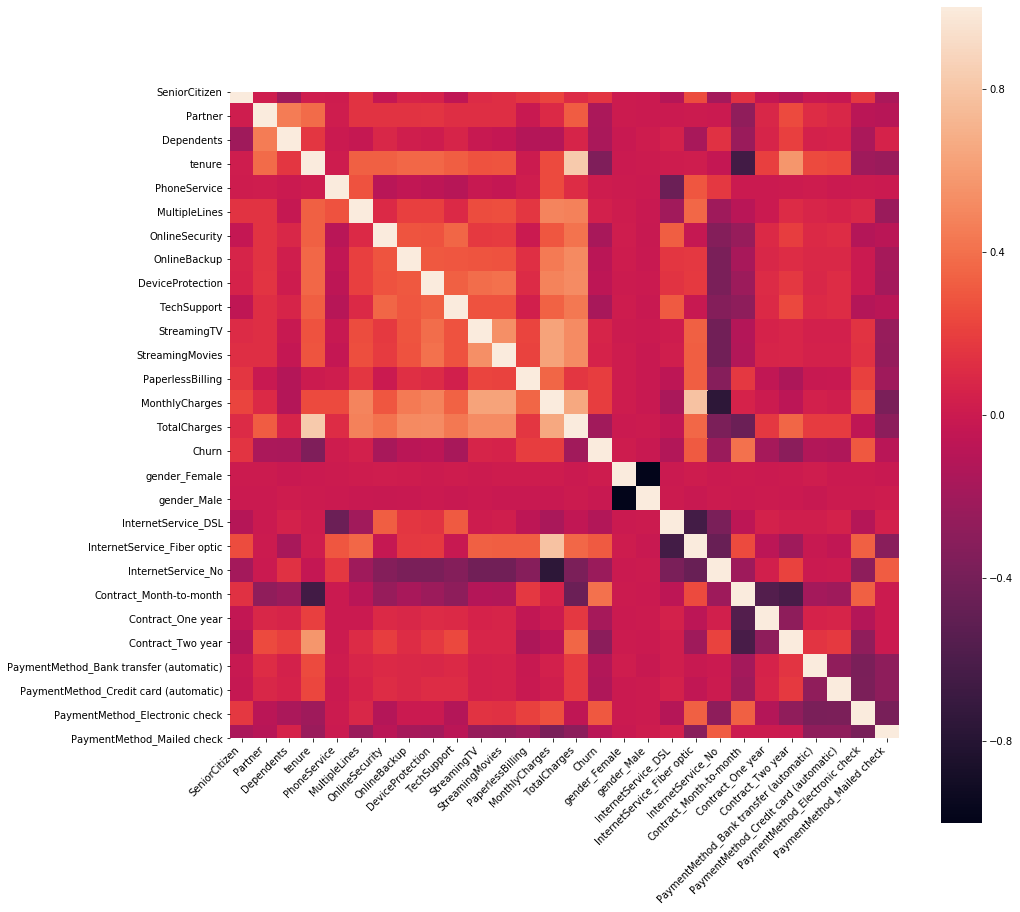

In [17]:
#Check the correlation between the features
corr = df_cleaned.corr()
plt.figure(figsize=(15,15))


ax = sns.heatmap(
    corr,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Split our dataset into train and test datasets¶

In [18]:
#Prepare dataset for modeling
x=df_cleaned.drop('Churn',1)
y=df_cleaned['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25 ,random_state = 111)

# Start building a classifier

In [19]:
# Here we fit 8 models on our data and check the metrics

import re
def model_churn_predictions(x_test, x_train, y_test, y_train):
    
    
    models = [LogisticRegression,
           DecisionTreeClassifier,
           KNeighborsClassifier,
           RandomForestClassifier,
           GaussianNB,
           SVC,
           LGBMClassifier,
           XGBClassifier]
    
    metrics = {'Accuracy':accuracy_score,
                   'Recall': recall_score,
                   'Precision':precision_score, 
                   'F1 Score': f1_score, 
                   'Roc Auc score': roc_auc_score}
   
    metric_model_dict={}
    
    for model in models:
        
        name_model = re.findall(r"[\w']+", str(model))[-1][:-1]
        metric_model_dict[name_model]={}
        
        if name_model=='SVC':
            model_i=SVC(C=0.5)
        else:
            model_i = model()
        
        model_i.fit(x_train, y_train)
        y_pred = model_i.predict(x_test)

        print(name_model)
        print('=============================')
        print('=============================')
        

        for name, metric in metrics.items():
            print(name) 
            metric_num = round(metric(y_test, y_pred),3)
            print(metric_num)
            print('=============================')
            
            metric_model_dict[name_model][name]=metric_num

        print('Confusion Matrix\n',confusion_matrix(y_test,y_pred), '\n')
        print('Classification Report\n', classification_report(y_test, y_pred))
        
        

    return metric_model_dict



# Compare models performances

/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
Accuracy
0.8
Recall
0.529
Precision
0.683
F1 Score
0.596
Roc Auc score
0.717
Confusion Matrix
 [[1148  120]
 [ 231  259]] 

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.68      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

DecisionTreeClassifier
Accuracy
0.721
Recall
0.465
Precision
0.499
F1 Score
0.482
Roc Auc score
0.642
Confusion Matrix
 [[1039  229]
 [ 262  228]] 

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1268
           1       0.50      0.47      0.48       490

    accuracy                           0.72      1758
   macro avg       0.65      0.64      0.65      1758
weighted avg       0.72      0.72      0.72      1758

KNeighbo

/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LGBMClassifier
Accuracy
0.788
Recall
0.51
Precision
0.654
F1 Score
0.573
Roc Auc score
0.703
Confusion Matrix
 [[1136  132]
 [ 240  250]] 

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1268
           1       0.65      0.51      0.57       490

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.78      1758

XGBClassifier
Accuracy
0.805
Recall
0.52
Precision
0.704
F1 Score
0.599
Roc Auc score
0.718
Confusion Matrix
 [[1161  107]
 [ 235  255]] 

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1268
           1       0.70      0.52      0.60       490

    accuracy                           0.81      1758
   macro avg       0.77      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



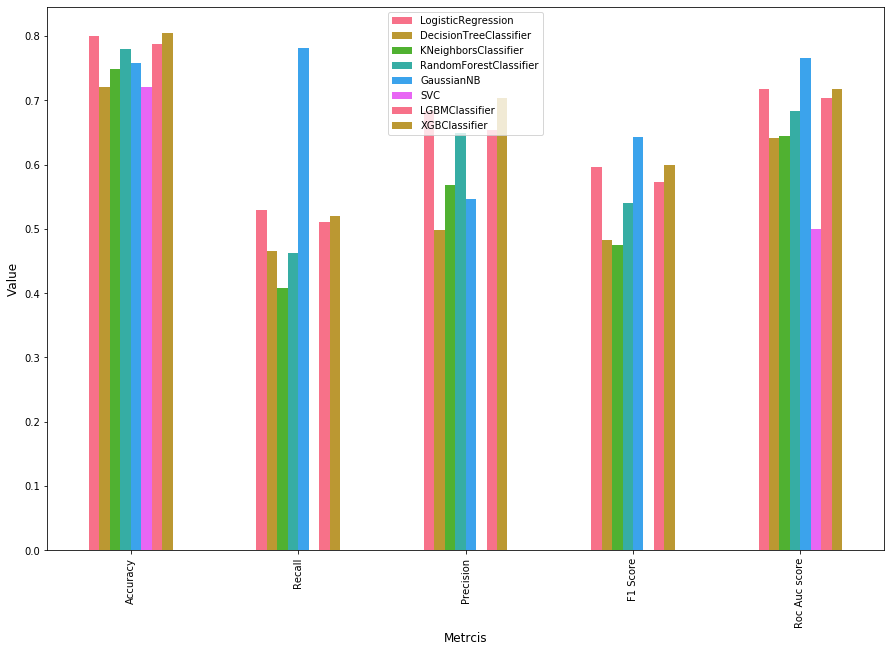

In [20]:
metric_model_dict = model_churn_predictions(x_test, x_train, y_test, y_train)

df_metrics = pd.DataFrame(metric_model_dict)

ax = df_metrics.plot(kind='bar', figsize=(15, 10))
ax.set_xlabel("Metrcis", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()

Our target metric - Recall, so the best perfomance is with GuassianNb model.

# Check the features importance

/Users/kate/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


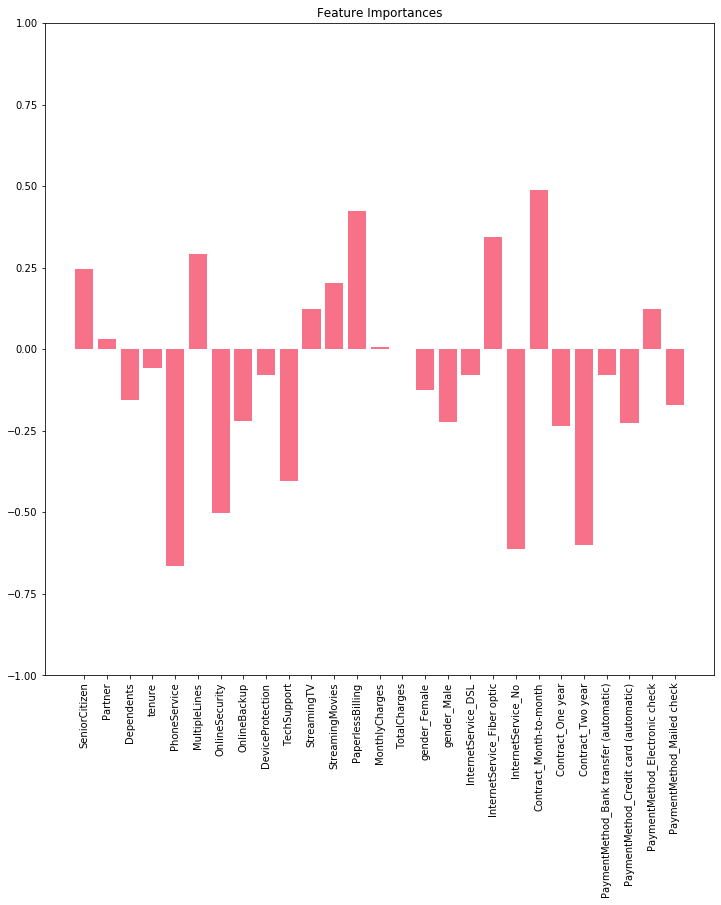

In [21]:
def feat_importance():
    lr= LogisticRegression( )
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    weights = pd.Series(lr.coef_[0],index=x.columns.values)
    weights.sort_values(ascending = False)
    
    plt.figure(figsize=(12,12))
    plt.bar(weights.index, weights.values)
    plt.xticks(rotation=90)
    plt.ylim([-1,1])
    plt.title('Feature Importances')
    plt.show()
    
    return
feat_importance()

# Scale the features

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Use GridSearch for parameters tunning for two models:
- Logistic Regression (second best perfomance)
- GaussianNB (best baseline perfomance)

In [23]:
from sklearn.model_selection import GridSearchCV
rf = LogisticRegression(class_weight='balanced', 
                   max_iter=100, solver='saga')
parameters = {
    'penalty': ['l1', 'l2'], 
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1]
}

Grid_LR = GridSearchCV(rf, parameters, scoring='recall', n_jobs=-1, verbose=1)
Grid_LR.fit(x_train, y_train)

print('Best score: ', Grid_LR.best_score_)
print('Best parameters set: \n', Grid_LR.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s


Best score:  0.7998735177865613
Best parameters set: 
 {'C': 0.01, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.5s finished


In [24]:
lr= LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   max_iter=100, n_jobs=None, penalty='l1',
                   random_state=101, solver='saga')
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print('Confusion_Matrix\n', confusion_matrix(y_test,y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))

probs_lr = lr.predict_proba(x_test)
preds_lr = probs_lr[:,1]

Confusion_Matrix
 [[933 335]
 [100 390]]
Recall: 0.7959183673469388
F1 Score: 0.6419753086419753


In [25]:
nb = GaussianNB()

parameters = {
    'var_smoothing': np.arange(0,1,0.05)     
}

Grid_NB = GridSearchCV(nb, parameters, scoring='recall', n_jobs=-1)
Grid_NB.fit(x_train, y_train)
print('Best score: ', Grid_NB.best_score_)
print('Best parameters set: \n', Grid_NB.best_params_)

Best score:  0.7969776021080369
Best parameters set: 
 {'var_smoothing': 0.65}


In [26]:
nb = GaussianNB(var_smoothing = 0.65)
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

print('Confusion_Matrix\n', confusion_matrix(y_test,y_pred_nb))
print('Recall:', recall_score(y_test, y_pred_nb))
print('F1 Score:', f1_score(y_test, y_pred_nb))

probs_nb = nb.predict_proba(x_test)
preds_nb = probs_nb[:,1]


Confusion_Matrix
 [[933 335]
 [103 387]]
Recall: 0.789795918367347
F1 Score: 0.6386138613861386


# Plot  Roc Auc and Precision-Recall curves

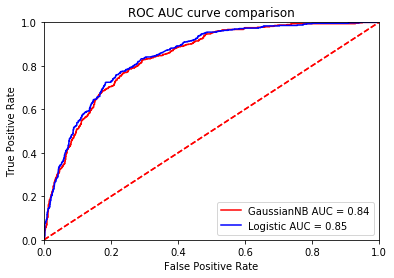

In [27]:
def plot_rocauc_curve(y_test, y_pred, color, model):

    fpr, tpr, thresh_lr = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    plt.title('ROC AUC curve comparison')
    plt.plot(fpr, tpr, 'b', label = f'{model} AUC = %0.2f' % roc_auc, color=color)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return

plot_rocauc_curve(y_test, preds_nb, 'r', 'GaussianNB')
plot_rocauc_curve(y_test, preds_lr, 'b', 'Logistic')




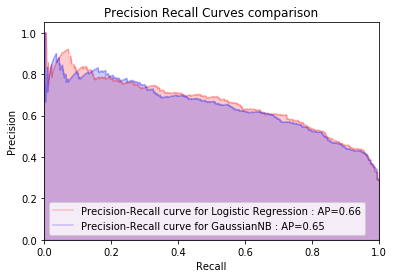

In [28]:

def pr_curve_comparison(y_test, y_pred, classifier_name, color):
    
    average_precision = average_precision_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, color=color,
    label = f'Precision-Recall curve for {classifier_name} : AP={average_precision:.2f}',
            alpha=0.2)    
    plt.fill_between(recall, precision, step='post', alpha=0.2, color=color)       
    plt.legend()
    plt.title('Precision Recall Curves comparison')


    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    return 

pr_curve_comparison(y_test, preds_lr,'Logistic Regression', 'r')
pr_curve_comparison(y_test, preds_nb,'GaussianNB', 'b')

# Ways to improve the model perfomance:
- Add demografics features ( as place where customer lives, age)
- Customer satisfaction features : customer support calls, number of problems reported)
- More data, especiall for churned customers